# Naive Bayes: Classificazione basata su Probabilità

In questo notebook esploreremo l'algoritmo Naive Bayes, un potente classificatore probabilistico basato sul teorema di Bayes.

- Implementeremo Naive Bayes da zero seguendo i concetti teorici
- Vedremo come funziona su diversi tipi di dataset
- Analizzeremo alcune varianti e ottimizzazioni

## 1. Introduzione all'Apprendimento basato su Probabilità

L'apprendimento probabilistico si basa su concetti fondamentali di teoria della probabilità:

- Frequenze relative
- Probabilità condizionate
- Regola del prodotto
- Regola della catena
- Teorema della probabilità totale


In [1]:
%pip install matplotlib-venn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Impostiamo un seed per la riproducibilità
np.random.seed(42)

### Creazione di un esempio semplice

Creiamo un semplice dataset che classifica le email come spam o non spam basato sulla presenza di alcune parole chiave:


In [3]:
# Creiamo un dataset di classificazione di email
data = {
    'id': range(1, 11),
    'contiene_offerta': [True, False, True, False, True, True, False, True, False, True],
    'contiene_sconto': [True, False, True, True, False, True, False, False, True, True],
    'contiene_allegato': [True, False, False, True, False, True, False, False, True, True],
    'is_spam': [True, False, True, False, False, True, False, False, False, True]
}

# Creiamo un DataFrame
df = pd.DataFrame(data)
print("Dataset di classificazione email:")
print(df)

Dataset di classificazione email:
   id  contiene_offerta  contiene_sconto  contiene_allegato  is_spam
0   1              True             True               True     True
1   2             False            False              False    False
2   3              True             True              False     True
3   4             False             True               True    False
4   5              True            False              False    False
5   6              True             True               True     True
6   7             False            False              False    False
7   8              True            False              False    False
8   9             False             True               True    False
9  10              True             True               True     True


### Calcolo di probabilità semplici

Vediamo come calcolare alcune probabilità di base dal nostro dataset:

In [4]:
# Numero totale di email
n_email = len(df)

# Probabilità non condizionate (prior)
p_spam = df['is_spam'].mean()
####sarebbe numero_di_spam / numero_totale_email
p_offerta = df['contiene_offerta'].mean()
p_sconto = df['contiene_sconto'].mean()
p_allegato = df['contiene_allegato'].mean()

print(f"\nProbabilità di spam: P(spam) = {p_spam:.2f}")
print(f"Probabilità di 'contiene_offerta': P(offerta) = {p_offerta:.2f}")
print(f"Probabilità di 'contiene_sconto': P(sconto) = {p_sconto:.2f}")
print(f"Probabilità di 'contiene_allegato': P(allegato) = {p_allegato:.2f}")


Probabilità di spam: P(spam) = 0.40
Probabilità di 'contiene_offerta': P(offerta) = 0.60
Probabilità di 'contiene_sconto': P(sconto) = 0.60
Probabilità di 'contiene_allegato': P(allegato) = 0.50


In [5]:

# Probabilità condizionate
p_offerta_dato_spam = df[df['is_spam'] == True]['contiene_offerta'].mean()
p_sconto_dato_spam = df[df['is_spam'] == True]['contiene_sconto'].mean()
p_allegato_dato_spam = df[df['is_spam'] == True]['contiene_allegato'].mean()

print(f"\nProbabilità di 'offerta' dato spam: P(offerta|spam) = {p_offerta_dato_spam:.2f}")
print(f"Probabilità di 'sconto' dato spam: P(sconto|spam) = {p_sconto_dato_spam:.2f}")
print(f"Probabilità di 'allegato' dato spam: P(allegato|spam) = {p_allegato_dato_spam:.2f}")


Probabilità di 'offerta' dato spam: P(offerta|spam) = 1.00
Probabilità di 'sconto' dato spam: P(sconto|spam) = 1.00
Probabilità di 'allegato' dato spam: P(allegato|spam) = 0.75


occhio! Tutte le spam hanno offerte, ma non tutte le offerte hanno spam. Stesso discorso vale per sconto

### Probabilità congiunta ed esempi della regola del prodotto

Le probabilità congiunte rappresentano la probabilità che due eventi si verifichino insieme.

In [6]:
# Probabilità congiunte
p_spam_e_offerta = df[(df['is_spam'] == True) & (df['contiene_offerta'] == True)].shape[0] / n_email
p_spam_e_sconto = df[(df['is_spam'] == True) & (df['contiene_sconto'] == True)].shape[0] / n_email
p_spam_e_allegato = df[(df['is_spam'] == True) & (df['contiene_allegato'] == True)].shape[0] / n_email

print(f"\nProbabilità congiunta di spam e offerta: P(spam, offerta) = {p_spam_e_offerta:.2f}")
print(f"Probabilità congiunta di spam e sconto: P(spam, sconto) = {p_spam_e_sconto:.2f}")
print(f"Probabilità congiunta di spam e allegato: P(spam, allegato) = {p_spam_e_allegato:.2f}")

# Verifichiamo la regola del prodotto: P(A,B) = P(A|B) * P(B)
p_offerta_dato_spam_per_p_spam = p_offerta_dato_spam * p_spam
print(f"\nVerifica della regola del prodotto:")
print(f"P(offerta|spam) * P(spam) = {p_offerta_dato_spam_per_p_spam:.2f}")
print(f"P(offerta, spam) = {p_spam_e_offerta:.2f}")

# Teorema della probabilità totale per la presenza di offerta
p_offerta_dato_spam = df[df['is_spam'] == True]['contiene_offerta'].mean()
p_offerta_dato_non_spam = df[df['is_spam'] == False]['contiene_offerta'].mean()

p_offerta_teorema_totale = p_offerta_dato_spam * p_spam + p_offerta_dato_non_spam * (1 - p_spam)
print(f"\nProbabilità di offerta usando il teorema della probabilità totale: {p_offerta_teorema_totale:.2f}")
print(f"Probabilità effettiva di offerta: {p_offerta:.2f}")


Probabilità congiunta di spam e offerta: P(spam, offerta) = 0.40
Probabilità congiunta di spam e sconto: P(spam, sconto) = 0.40
Probabilità congiunta di spam e allegato: P(spam, allegato) = 0.30

Verifica della regola del prodotto:
P(offerta|spam) * P(spam) = 0.40
P(offerta, spam) = 0.40

Probabilità di offerta usando il teorema della probabilità totale: 0.60
Probabilità effettiva di offerta: 0.60


### Visualizzazione delle probabilità condizionate

In [7]:
# Visualizziamo le probabilità condizionate
condizionate = {
    'Caratteristica': ['Offerta', 'Sconto', 'Allegato'],
    'P(caratteristica|spam)': [p_offerta_dato_spam, p_sconto_dato_spam, p_allegato_dato_spam],
    'P(caratteristica|non spam)': [
        df[df['is_spam'] == False]['contiene_offerta'].mean(),
        df[df['is_spam'] == False]['contiene_sconto'].mean(),
        df[df['is_spam'] == False]['contiene_allegato'].mean()
    ]
}

df_condizionate = pd.DataFrame(condizionate)
print("\nProbabilità condizionate delle caratteristiche:")
print(df_condizionate)


Probabilità condizionate delle caratteristiche:
  Caratteristica  P(caratteristica|spam)  P(caratteristica|non spam)
0        Offerta                    1.00                    0.333333
1         Sconto                    1.00                    0.333333
2       Allegato                    0.75                    0.333333


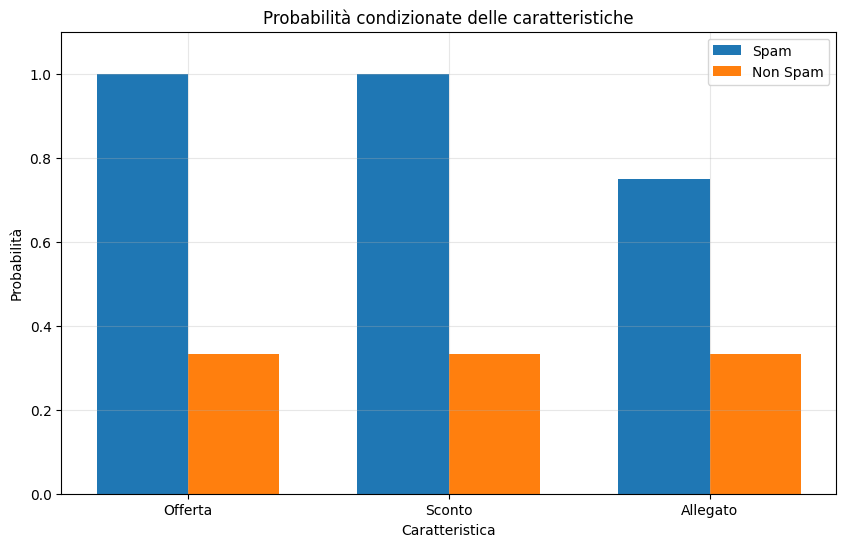

In [8]:
# Creiamo un grafico a barre delle probabilità condizionate
plt.figure(figsize=(10, 6))
x = np.arange(len(df_condizionate['Caratteristica']))
width = 0.35

plt.bar(x - width/2, df_condizionate['P(caratteristica|spam)'], width, label='Spam')
plt.bar(x + width/2, df_condizionate['P(caratteristica|non spam)'], width, label='Non Spam')

plt.xlabel('Caratteristica')
plt.ylabel('Probabilità')
plt.title('Probabilità condizionate delle caratteristiche')
plt.xticks(x, df_condizionate['Caratteristica'])
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.1)

plt.show()

# 2. Il Teorema di Bayes e la Classificazione

Il teorema di Bayes è fondamentale per capire come funziona il classificatore Naive Bayes. Esso fornisce un modo per calcolare la probabilità di una classe dato un insieme di caratteristiche.

## 2.1 Il Teorema di Bayes

Il teorema di Bayes afferma che la probabilità che un evento Y si verifichi data un'evidenza X è proporzionale alla probabilità che l'evidenza X sia associata all'evento Y moltiplicata per la probabilità dell'evento Y stesso:

$$P(Y|X) = \frac{P(X|Y) \times P(Y)}{P(X)}$$

Dove:

$P(Y|X)$ è la probabilità a posteriori dell'evento Y dato X

$P(X|Y)$ è la probabilità (verosimiglianza) dell'evidenza X dato l'evento Y

$P(Y)$ è la probabilità a priori dell'evento Y

$P(X)$ è la probabilità marginale dell'evidenza X

Nel contesto della classificazione, possiamo riscrivere il teorema come:

$$P(y=l|q) = \frac{P(q|y=l) \times P(y=l)}{P(q)}$$

Dove:
- $y=l$ rappresenta una classe (livello) del nostro problema di classificazione
- $q$ rappresenta le caratteristiche dell'istanza da classificare


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Imposta un seed per la riproducibilità
np.random.seed(42)

## 2.2 Un Esempio Pratico: Classificazione di Recensioni di Film

Creiamo un dataset sintetico per la classificazione di recensioni di film come positive o negative:

In [10]:
n_samples = 1000
np.random.seed(42)

# Probabilità base per recensione positiva
p_positiva = 0.6

# Generiamo le etichette delle recensioni
recensione_positiva = np.random.choice([True, False], size=n_samples, p=[p_positiva, 1-p_positiva])

# Generiamo le caratteristiche con probabilità condizionate diverse per recensioni positive e negative
def genera_caratteristica(recensione_positiva, p_dato_positiva, p_dato_negativa):
    probs = np.where(recensione_positiva, p_dato_positiva, p_dato_negativa)
    return np.random.random(n_samples) < probs

# Probabilità condizionate per le varie caratteristiche
contiene_ottimo = genera_caratteristica(recensione_positiva, 0.8, 0.1)  # P(ottimo|positiva)=0.8, P(ottimo|negativa)=0.1
contiene_buono = genera_caratteristica(recensione_positiva, 0.6, 0.3)   # P(buono|positiva)=0.6, P(buono|negativa)=0.3
contiene_delusione = genera_caratteristica(recensione_positiva, 0.1, 0.7)  # P(delusione|positiva)=0.1, P(delusione|negativa)=0.7

# Creiamo il dataframe
df_recensioni = pd.DataFrame({
    'contiene_ottimo': contiene_ottimo,
    'contiene_buono': contiene_buono,
    'contiene_delusione': contiene_delusione,
    'recensione_positiva': recensione_positiva
})

# Visualizziamo le prime righe del dataset
print("Dataset di recensioni di film (prime 10 righe):")
print(df_recensioni.head(10))

Dataset di recensioni di film (prime 10 righe):
   contiene_ottimo  contiene_buono  contiene_delusione  recensione_positiva
0             True            True               False                 True
1            False            True               False                False
2            False           False                True                False
3             True            True               False                 True
4            False            True               False                 True
5             True           False               False                 True
6             True            True               False                 True
7            False           False                True                False
8            False            True                True                False
9            False           False                True                False


### 2.3 Calcolo delle Probabilità per il Teorema di Bayes

Calcoliamo tutte le probabilità necessarie per applicare il teorema di Bayes:


In [11]:
# Calcoliamo la probabilità a priori (prior)
p_positiva = df_recensioni['recensione_positiva'].mean()
print(f"Probabilità a priori di recensione positiva: P(positiva) = {p_positiva:.4f}")

# Calcoliamo le probabilità condizionate per ogni caratteristica
p_ottimo_dato_positiva = df_recensioni[df_recensioni['recensione_positiva']]['contiene_ottimo'].mean()
p_buono_dato_positiva = df_recensioni[df_recensioni['recensione_positiva']]['contiene_buono'].mean()
p_delusione_dato_positiva = df_recensioni[df_recensioni['recensione_positiva']]['contiene_delusione'].mean()

p_ottimo_dato_negativa = df_recensioni[~df_recensioni['recensione_positiva']]['contiene_ottimo'].mean()
p_buono_dato_negativa = df_recensioni[~df_recensioni['recensione_positiva']]['contiene_buono'].mean()
p_delusione_dato_negativa = df_recensioni[~df_recensioni['recensione_positiva']]['contiene_delusione'].mean()

# Mostriamo le probabilità condizionate
prob_condizionate = pd.DataFrame({
    'Caratteristica': ['Contiene "ottimo"', 'Contiene "buono"', 'Contiene "delusione"'],
    'P(caratteristica|positiva)': [p_ottimo_dato_positiva, p_buono_dato_positiva, p_delusione_dato_positiva],
    'P(caratteristica|negativa)': [p_ottimo_dato_negativa, p_buono_dato_negativa, p_delusione_dato_negativa]
})
print("\nProbabilità condizionate:")
print(prob_condizionate)

Probabilità a priori di recensione positiva: P(positiva) = 0.6130

Probabilità condizionate:
         Caratteristica  P(caratteristica|positiva)  \
0     Contiene "ottimo"                    0.787928   
1      Contiene "buono"                    0.597064   
2  Contiene "delusione"                    0.097879   

   P(caratteristica|negativa)  
0                    0.085271  
1                    0.317829  
2                    0.718346  


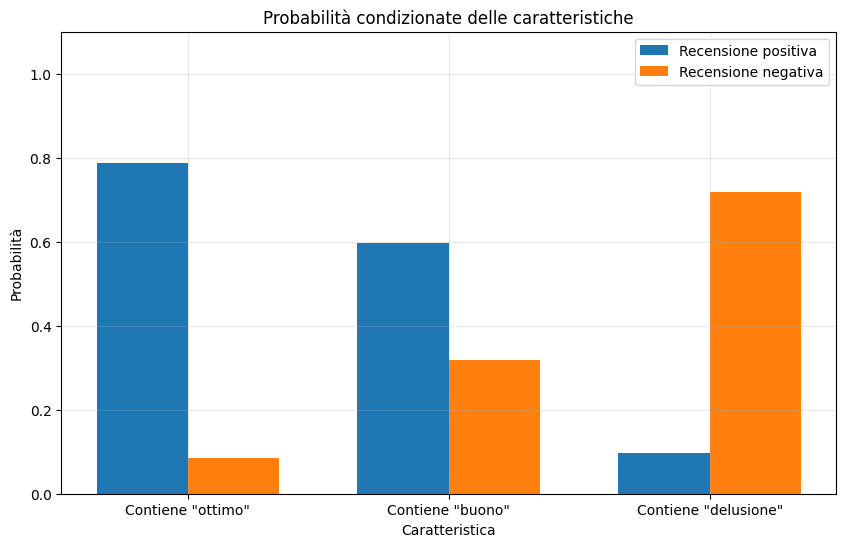

In [12]:
# Visualizziamo con un grafico
plt.figure(figsize=(10, 6))
x = np.arange(len(prob_condizionate['Caratteristica']))
width = 0.35

plt.bar(x - width/2, prob_condizionate['P(caratteristica|positiva)'], width, label='Recensione positiva')
plt.bar(x + width/2, prob_condizionate['P(caratteristica|negativa)'], width, label='Recensione negativa')

plt.xlabel('Caratteristica')
plt.ylabel('Probabilità')
plt.title('Probabilità condizionate delle caratteristiche')
plt.xticks(x, prob_condizionate['Caratteristica'])
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.1)

plt.show()

### 2.4 Applicazione del Teorema di Bayes per Classificare una Recensione

Ora utilizziamo il teorema di Bayes per classificare una recensione con specifiche caratteristiche:


In [13]:
def calcola_probabilita_bayes(caratteristiche, probabilita_condizionate, p_priori):
    """
    Calcola la probabilità di recensione positiva dato un insieme di caratteristiche usando il teorema di Bayes.
    
    Parametri:
    caratteristiche -- dizionario con le caratteristiche e il loro valore (True/False)
    probabilita_condizionate -- dataframe con le probabilità condizionate
    p_priori -- probabilità a priori della recensione positiva
    
    Returns:
    p_positiva_dato_caratteristiche -- probabilità a posteriori della recensione positiva
    p_negativa_dato_caratteristiche -- probabilità a posteriori della recensione negativa
    """
    # Probabilità a priori
    p_positiva = p_priori
    p_negativa = 1 - p_priori
    
    # Calcoliamo P(caratteristiche|positiva) e P(caratteristiche|negativa)
    p_caratteristiche_dato_positiva = 1.0
    p_caratteristiche_dato_negativa = 1.0
    
    for caratteristica, presente in caratteristiche.items():
        idx = probabilita_condizionate[probabilita_condizionate['Caratteristica'] == caratteristica].index[0]
        
        if presente:
            # Se la caratteristica è presente, usiamo P(caratteristica|positiva)
            p_caratteristiche_dato_positiva *= probabilita_condizionate.loc[idx, 'P(caratteristica|positiva)']
            p_caratteristiche_dato_negativa *= probabilita_condizionate.loc[idx, 'P(caratteristica|negativa)']
        else:
            # Se la caratteristica non è presente, usiamo 1 - P(caratteristica|positiva)
            p_caratteristiche_dato_positiva *= (1 - probabilita_condizionate.loc[idx, 'P(caratteristica|positiva)'])
            p_caratteristiche_dato_negativa *= (1 - probabilita_condizionate.loc[idx, 'P(caratteristica|negativa)'])
    
    # Calcoliamo P(caratteristiche) usando il teorema della probabilità totale
    p_caratteristiche = p_caratteristiche_dato_positiva * p_positiva + p_caratteristiche_dato_negativa * p_negativa
    
    # Applichiamo il teorema di Bayes
    p_positiva_dato_caratteristiche = (p_caratteristiche_dato_positiva * p_positiva) / p_caratteristiche
    p_negativa_dato_caratteristiche = (p_caratteristiche_dato_negativa * p_negativa) / p_caratteristiche
    
    return p_positiva_dato_caratteristiche, p_negativa_dato_caratteristiche

### Esempio di calcolo di verosimiglianza con Naive Bayes


In [2]:

"""Recensione con tre parole: "ottimo" (presente), "buono" (presente), "delusione" (assente)

Probabilità condizionate date

P(parola | classe)"""

p_ottimo_dato_positiva = 0.8
p_buono_dato_positiva = 0.6
p_non_delusione_dato_positiva = 0.9

Calcolo della verosimiglianza P(X|Y) dove:

X = caratteristiche della recensione

Y = classe "positiva"

Assumendo l'indipendenza condizionata (assunzione "naive"):

P(X|Y) = P(ottimo|positiva) × P(buono|positiva) × P(non delusione|positiva)

Calcolo passo-passo

In [3]:
p_caratteristiche_dato_positiva = 1.0  # Inizializziamo a 1
p_caratteristiche_dato_positiva *= p_ottimo_dato_positiva  # Moltiplichiamo per P(ottimo|positiva)
print(f"Dopo 'ottimo': {p_caratteristiche_dato_positiva:.4f}")

p_caratteristiche_dato_positiva *= p_buono_dato_positiva  # Moltiplichiamo per P(buono|positiva)
print(f"Dopo 'buono': {p_caratteristiche_dato_positiva:.4f}")

p_caratteristiche_dato_positiva *= p_non_delusione_dato_positiva  # Moltiplichiamo per P(non delusione|positiva)
print(f"Dopo 'non delusione': {p_caratteristiche_dato_positiva:.4f}")

print("\nRisultato finale:")
print(f"P(caratteristiche|positiva) = 1.0 × {p_ottimo_dato_positiva} × {p_buono_dato_positiva} × {p_non_delusione_dato_positiva} = {p_caratteristiche_dato_positiva:.4f}")

Dopo 'ottimo': 0.8000
Dopo 'buono': 0.4800
Dopo 'non delusione': 0.4320

Risultato finale:
P(caratteristiche|positiva) = 1.0 × 0.8 × 0.6 × 0.9 = 0.4320


Nota: Per una classificazione completa, dovremmo calcolare anche:

1. P(caratteristiche|negativa)

2. P(positiva) e P(negativa) - le probabilità a priori delle classi

3. Quindi applicare il teorema di Bayes per trovare P(positiva|caratteristiche)


In [14]:
# Caso 1: Recensione con "ottimo" e "buono", senza "delusione"
caratteristiche_recensione1 = {'Contiene "ottimo"': True, 'Contiene "buono"': True, 'Contiene "delusione"': False}
p_positiva_dato_car1, p_negativa_dato_car1 = calcola_probabilita_bayes(
    caratteristiche_recensione1, prob_condizionate, p_positiva
)

print("\nCaso 1: Recensione con 'ottimo' e 'buono', senza 'delusione'")
print(f"Probabilità di recensione positiva: {p_positiva_dato_car1:.4f}")
print(f"Probabilità di recensione negativa: {p_negativa_dato_car1:.4f}")
print(f"Classificazione: {'Positiva' if p_positiva_dato_car1 > p_negativa_dato_car1 else 'Negativa'}")



Caso 1: Recensione con 'ottimo' e 'buono', senza 'delusione'
Probabilità di recensione positiva: 0.9888
Probabilità di recensione negativa: 0.0112
Classificazione: Positiva


In [15]:
# Caso 2: Recensione senza parole positive ma con "delusione"
caratteristiche_recensione2 = {'Contiene "ottimo"': False, 'Contiene "buono"': False, 'Contiene "delusione"': True}
p_positiva_dato_car2, p_negativa_dato_car2 = calcola_probabilita_bayes(
    caratteristiche_recensione2, prob_condizionate, p_positiva
)

print("\nCaso 2: Recensione senza parole positive ma con 'delusione'")
print(f"Probabilità di recensione positiva: {p_positiva_dato_car2:.4f}")
print(f"Probabilità di recensione negativa: {p_negativa_dato_car2:.4f}")
print(f"Classificazione: {'Positiva' if p_positiva_dato_car2 > p_negativa_dato_car2 else 'Negativa'}")



Caso 2: Recensione senza parole positive ma con 'delusione'
Probabilità di recensione positiva: 0.0287
Probabilità di recensione negativa: 0.9713
Classificazione: Negativa


In [16]:
# Caso 3: Recensione con una combinazione mista di parole
caratteristiche_recensione3 = {'Contiene "ottimo"': False, 'Contiene "buono"': True, 'Contiene "delusione"': True}
p_positiva_dato_car3, p_negativa_dato_car3 = calcola_probabilita_bayes(
    caratteristiche_recensione3, prob_condizionate, p_positiva
)

print("\nCaso 3: Recensione con una combinazione mista di parole")
print(f"Probabilità di recensione positiva: {p_positiva_dato_car3:.4f}")
print(f"Probabilità di recensione negativa: {p_negativa_dato_car3:.4f}")
print(f"Classificazione: {'Positiva' if p_positiva_dato_car3 > p_negativa_dato_car3 else 'Negativa'}")



Caso 3: Recensione con una combinazione mista di parole
Probabilità di recensione positiva: 0.0859
Probabilità di recensione negativa: 0.9141
Classificazione: Negativa


### 2.5 Difficoltà con la Regola della Catena

Nella nostra implementazione precedente, abbiamo calcolato $P(q|y=l)$ direttamente moltiplicando le probabilità condizionate di ogni caratteristica. Questo funziona perché abbiamo fatto un'assunzione di indipendenza.

In generale, per calcolare la probabilità congiunta di più feature, dovremmo usare la regola della catena:

$$P(q) = P(q_1, ..., q_D) = P(q_1) \times P(q_2|q_1) \times ... \times P(q_D|q_{D-1}, ..., q_2, q_1)$$

E nel nostro caso:

$$P(q|y=l) = P(q_1|y=l) \times P(q_2|q_1, y=l) \times ... \times P(q_D|q_{D-1}, ..., q_2, q_1, y=l)$$

Il problema è che questa formula richiede di calcolare molte probabilità condizionate complesse, che potrebbero non essere disponibili nei nostri dati o potrebbero richiedere troppi dati per essere stimate accuratamente. Questo è noto come "problema della frammentazione dei dati" o "curse of dimensionality".

1. Problema della dimensionalità

    Un classificatore bayesiano completo richiede di stimare la probabilità congiunta di tutte le caratteristiche dato un valore della classe:

        P(x1,x2,...,xn∣y)P(x_1, x_2, ..., x_n | y)P(x1​,x2​,...,xn​∣y)

        Senza l'assunzione di indipendenza, questo diventa estremamente problematico:

        Con solo 10 caratteristiche binarie, abbiamo 2^10 = 1024

        2^10=1024 combinazioni possibili

        Con 20 caratteristiche, arriviamo a 2^20= 1.048.576 combinazioni

    Per ogni classe!

2. Necessità di dati enormi

    Per stimare in modo affidabile tutte queste probabilità congiunte, avremmo bisogno di:


        Un dataset gigantesco che copra tutte (o la maggior parte) delle possibili combinazioni

        Molti esempi per ogni combinazione per ottenere stime statisticamente significative

        Nella pratica, anche con grandi dataset, molte combinazioni di caratteristiche non avranno esempi sufficienti o non compariranno affatto.

3. Complessità computazionale

    Un modello bayesiano completo richiede:

        Memorizzazione di un numero esponenziale di parametri

        Tempi di addestramento molto più lunghi

        Maggiore complessità di implementazione

# 3. Naive Bayes: Assunzione di Indipendenza Condizionale

## 3.1 L'Assunzione "Naive" di Indipendenza Condizionale

Il Naive Bayes è chiamato "naive" (ingenuo) perché fa un'assunzione semplificativa ma potente: assume che tutte le caratteristiche (feature) siano condizionalmente indipendenti tra loro dato il valore della classe target.

### Indipendenza tra Eventi

Due eventi $X$ e $Y$ si dicono indipendenti se:

$$P(X|Y) = P(X)$$

In altre parole, conoscere $Y$ non fornisce alcuna informazione su $X$. Per eventi indipendenti vale anche:

$$P(X, Y) = P(X) \times P(Y)$$

### Indipendenza Condizionale

L'indipendenza condizionale è una forma più debole di indipendenza. Due eventi $X$ e $Y$ sono condizionalmente indipendenti dato un terzo evento $Z$ se:

$$P(X|Y, Z) = P(X|Z)$$

Ovvero, una volta noto $Z$, conoscere $Y$ non fornisce ulteriori informazioni su $X$. Vale anche:

$$P(X, Y|Z) = P(X|Z) \times P(Y|Z)$$

### L'Assunzione Naive Bayes

Nel classificatore Naive Bayes, assumiamo che tutte le feature $q_1, q_2, ..., q_D$ siano condizionalmente indipendenti dato il valore della classe $y = l$:

$$P(q|y=l) = P(q_1|y=l) \times P(q_2|y=l) \times ... \times P(q_D|y=l) = \prod_{d=1}^{D} P(q_d|y=l)$$

Questa assunzione semplifica enormemente il calcolo della probabilità congiunta, permettendoci di evitare il "curse of dimensionality".


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

# Impostiamo un seed per la riproducibilità
np.random.seed(42)

## 3.2 Verifica dell'Indipendenza Condizionale

Verifichiamo se l'assunzione di indipendenza condizionale è valida per un dataset di recensioni di film:


In [18]:
# Creiamo un dataset sintetico più complesso per le recensioni di film
n_samples = 1000
np.random.seed(42)

# Probabilità base per recensione positiva
p_positiva = 0.6

# Generiamo le etichette delle recensioni
recensione_positiva = np.random.choice([True, False], size=n_samples, p=[p_positiva, 1-p_positiva])


In [19]:
# Generiamo le caratteristiche con probabilità condizionate diverse per recensioni positive e negative
def genera_caratteristica(recensione_positiva, p_dato_positiva, p_dato_negativa):
    probs = np.where(recensione_positiva, p_dato_positiva, p_dato_negativa)
    return np.random.random(n_samples) < probs

# Caratteristiche indipendenti condizionalmente
contiene_ottimo = genera_caratteristica(recensione_positiva, 0.8, 0.1)
contiene_buono = genera_caratteristica(recensione_positiva, 0.6, 0.3)

# Caratteristica NON indipendente condizionalmente (dipende da "ottimo")
# Una recensione che contiene "ottimo" ha più probabilità di contenere "fantastico"
p_fantastico_dato_ottimo_positiva = 0.9      # P(fantastico|ottimo, positiva)
p_fantastico_dato_non_ottimo_positiva = 0.4   # P(fantastico|non ottimo, positiva)
p_fantastico_dato_ottimo_negativa = 0.7   # P(fantastico|ottimo, negativa)
p_fantastico_dato_non_ottimo_negativa = 0.05 # P(fantastico|non ottimo, negativa)

In [20]:
# Generiamo "fantastico" in base a "ottimo" e "recensione_positiva"
contiene_fantastico = np.zeros(n_samples, dtype=bool)
for i in range(n_samples):
    if recensione_positiva[i] and contiene_ottimo[i]:
        contiene_fantastico[i] = np.random.random() < p_fantastico_dato_ottimo_positiva
    elif recensione_positiva[i] and not contiene_ottimo[i]:
        contiene_fantastico[i] = np.random.random() < p_fantastico_dato_non_ottimo_positiva
    elif not recensione_positiva[i] and contiene_ottimo[i]:
        contiene_fantastico[i] = np.random.random() < p_fantastico_dato_ottimo_negativa
    else:  # not recensione_positiva[i] and not contiene_ottimo[i]
        contiene_fantastico[i] = np.random.random() < p_fantastico_dato_non_ottimo_negativa

# Creiamo il dataframe
df_recensioni = pd.DataFrame({
    'contiene_ottimo': contiene_ottimo,
    'contiene_buono': contiene_buono,
    'contiene_fantastico': contiene_fantastico,
    'recensione_positiva': recensione_positiva
})

In [21]:
# Verifichiamo se buono e ottimo sono condizionalmente indipendenti dato recensione_positiva
print("Verifica di indipendenza condizionale tra 'buono' e 'ottimo' dato recensione_positiva:")
print("\nVerifica di indipendenza condizionale tra 'fantastico' e 'ottimo' dato recensione_positiva:")
print("\nPer recensioni POSITIVE:")
print(f"P(fantastico|positiva) = {df_recensioni[df_recensioni['recensione_positiva']]['contiene_fantastico'].mean():.4f}")
print(f"P(fantastico|ottimo, positiva) = {df_recensioni[(df_recensioni['recensione_positiva']) & (df_recensioni['contiene_ottimo'])]['contiene_fantastico'].mean():.4f}")
print(f"P(fantastico|non ottimo, positiva) = {df_recensioni[(df_recensioni['recensione_positiva']) & (~df_recensioni['contiene_ottimo'])]['contiene_fantastico'].mean():.4f}")

print("\nPer recensioni NEGATIVE:")
print(f"P(fantastico|negativa) = {df_recensioni[~df_recensioni['recensione_positiva']]['contiene_fantastico'].mean():.4f}")
print(f"P(fantastico|ottimo, negativa) = {df_recensioni[(~df_recensioni['recensione_positiva']) & (df_recensioni['contiene_ottimo'])]['contiene_fantastico'].mean():.4f}")
print(f"P(fantastico|non ottimo, negativa) = {df_recensioni[(~df_recensioni['recensione_positiva']) & (~df_recensioni['contiene_ottimo'])]['contiene_fantastico'].mean():.4f}")

Verifica di indipendenza condizionale tra 'buono' e 'ottimo' dato recensione_positiva:

Verifica di indipendenza condizionale tra 'fantastico' e 'ottimo' dato recensione_positiva:

Per recensioni POSITIVE:
P(fantastico|positiva) = 0.7993
P(fantastico|ottimo, positiva) = 0.9172
P(fantastico|non ottimo, positiva) = 0.3615

Per recensioni NEGATIVE:
P(fantastico|negativa) = 0.1111
P(fantastico|ottimo, negativa) = 0.7273
P(fantastico|non ottimo, negativa) = 0.0537


I risultati mostrano che:
- 'buono' e 'ottimo' sembrano essere quasi condizionalmente indipendenti dato il valore di 'recensione_positiva'
- 'fantastico' e 'ottimo' NON sono condizionalmente indipendenti, poiché abbiamo costruito il dataset in modo che ci sia una dipendenza

## 3.3 Implementazione dell'Algoritmo Naive Bayes

Ora implementiamo l'algoritmo Naive Bayes da zero per la classificazione di testi basandoci sull'assunzione di indipendenza condizionale:


In [22]:
# Funzione per evitare underflow nelle operazioni con logaritmi
def logsumexp(a):
    """
    Calcola log(sum(exp(a))) in modo numericalmente stabile.
    """
    a_max = np.max(a)
    return a_max + np.log(np.sum(np.exp(a - a_max)))

class NaiveBayes:
    """
    Implementazione dell'algoritmo Naive Bayes per classificazione.
    
    Parametri:
    ----------
    smoothing : float, default=1.0
        Parametro di smoothing per evitare probabilità zero (smoothing di Laplace).
    """
    
    def __init__(self, smoothing=1.0):
        self.smoothing = smoothing
        self.class_priors = {}  # Probabilità a priori delle classi
        self.feature_probs = {}  # Probabilità condizionate delle feature dato la classe
        self.classes = None
        self.features = None
    
    def fit(self, X, y):
        """
        Addestra il classificatore Naive Bayes.
        
        Parametri:
        ----------
        X : array-like, shape (n_samples, n_features)
            Matrice delle feature.
        y : array-like, shape (n_samples,)
            Vettore delle classi.
        
        Returns:
        --------
        self : object
        """
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        self.features = np.arange(n_features)
        
        # Calcolo delle probabilità a priori delle classi
        for c in self.classes:
            self.class_priors[c] = np.mean(y == c)
        
        # Calcolo delle probabilità condizionate delle feature
        for c in self.classes:
            self.feature_probs[c] = {}
            X_c = X[y == c]
            
            for feature_idx in self.features:
                # Calcolo con smoothing di Laplace
                feature_values = X_c[:, feature_idx]
                count = np.sum(feature_values) + self.smoothing
                total = len(feature_values) + 2 * self.smoothing  # +2 per True e False
                
                self.feature_probs[c][feature_idx] = count / total
        
        return self
    
    def predict_proba(self, X):
        """
        Restituisce le probabilità delle classi per i campioni in X.
        
        Parametri:
        ----------
        X : array-like, shape (n_samples, n_features)
            Matrice delle feature. Può essere un array NumPy o una lista di liste.
        
        Returns:
        --------
        array, shape (n_samples, n_classes) : Le probabilità di ogni classe per ogni campione.
        """
        # Convertiamo X in un array NumPy se non lo è già
        X = np.array(X)
        n_samples = X.shape[0]
        n_classes = len(self.classes)
        probas = np.zeros((n_samples, n_classes))
        
        for i, sample in enumerate(X):
            for j, c in enumerate(self.classes):
                # Probabilità a priori
                proba = np.log(self.class_priors[c])
                
                # Prodotto delle probabilità condizionate (in log-spazio per evitare underflow)
                for feature_idx in self.features:
                    feature_value = sample[feature_idx]
                    feature_prob = self.feature_probs[c][feature_idx]
                    
                    if feature_value:
                        proba += np.log(feature_prob)
                    else:
                        proba += np.log(1 - feature_prob)
                
                probas[i, j] = proba
        
        # Convertiamo da log-spazio a probabilità normalizzate
        log_prob_sum = np.array([logsumexp(probas[i]) for i in range(n_samples)])
        probas = np.exp(probas - log_prob_sum.reshape(-1, 1))
        
        return probas
    
    def predict(self, X):
        """
        Predice le classi per i campioni in X.
        
        Parametri:
        ----------
        X : array-like, shape (n_samples, n_features)
            Matrice delle feature. Può essere un array NumPy o una lista di liste.
        
        Returns:
        --------
        array, shape (n_samples,) : Le classi predette.
        """
        # Convertiamo X in un array NumPy se non lo è già
        X = np.array(X)
        probas = self.predict_proba(X)
        return self.classes[np.argmax(probas, axis=1)]
    
    def score(self, X, y):
        """
        Calcola l'accuratezza del classificatore.
        
        Parametri:
        ----------
        X : array-like, shape (n_samples, n_features)
            Matrice delle feature di test.
        y : array-like, shape (n_samples,)
            Classi vere dei campioni di test.
        
        Returns:
        --------
        float : Accuratezza del classificatore.
        """
        return np.mean(self.predict(X) == y)


## 3.4 Test del Classificatore Naive Bayes

Testiamo il nostro classificatore sul dataset delle recensioni:

In [23]:
# Prepariamo il dataset
X = df_recensioni[['contiene_ottimo', 'contiene_buono', 'contiene_fantastico']].values
y = df_recensioni['recensione_positiva'].values

# Dividiamo in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Addestriamo il modello
nb = NaiveBayes(smoothing=1.0)
nb.fit(X_train, y_train)

# Valutiamo il modello
accuracy = nb.score(X_test, y_test)
print(f"\nAccuratezza del modello: {accuracy:.4f}")

# Verifichiamo le probabilità apprese
print("\nProbabilità a priori:")
for c in nb.classes:
    print(f"P(classe={c}) = {nb.class_priors[c]:.4f}")

print("\nProbabilità condizionate:")
feature_names = ['contiene_ottimo', 'contiene_buono', 'contiene_fantastico']
for c in nb.classes:
    print(f"Per classe={c}:")
    for feature_idx, feature_name in enumerate(feature_names):
        print(f"  P({feature_name}|classe={c}) = {nb.feature_probs[c][feature_idx]:.4f}")

# Facciamo alcune predizioni di esempio
print("\nPredizioni di esempio:")
examples = [
    [True, True, True],    # ottimo, buono, fantastico
    [False, False, False], # nessuna parola positiva
    [True, False, False],  # solo ottimo
    [False, True, False],  # solo buono
    [False, False, True]   # solo fantastico
]

example_names = [
    "Recensione con 'ottimo', 'buono' e 'fantastico'",
    "Recensione senza parole positive",
    "Recensione con solo 'ottimo'",
    "Recensione con solo 'buono'",
    "Recensione con solo 'fantastico'"
]

for i, example in enumerate(examples):
    proba = nb.predict_proba([example])[0]
    predicted_class = nb.predict([example])[0]
    print(f"{example_names[i]}:")
    print(f"  P(positiva|recensione) = {proba[1]:.4f}")
    print(f"  P(negativa|recensione) = {proba[0]:.4f}")
    print(f"  Classificazione: {'Positiva' if predicted_class else 'Negativa'}")


Accuratezza del modello: 0.8800

Probabilità a priori:
P(classe=False) = 0.3937
P(classe=True) = 0.6062

Probabilità condizionate:
Per classe=False:
  P(contiene_ottimo|classe=False) = 0.0883
  P(contiene_buono|classe=False) = 0.3155
  P(contiene_fantastico|classe=False) = 0.1136
Per classe=True:
  P(contiene_ottimo|classe=True) = 0.7741
  P(contiene_buono|classe=True) = 0.5893
  P(contiene_fantastico|classe=True) = 0.8029

Predizioni di esempio:
Recensione con 'ottimo', 'buono' e 'fantastico':
  P(positiva|recensione) = 0.9944
  P(negativa|recensione) = 0.0056
  Classificazione: Positiva
Recensione senza parole positive:
  P(positiva|recensione) = 0.0484
  P(negativa|recensione) = 0.9516
  Classificazione: Negativa
Recensione con solo 'ottimo':
  P(positiva|recensione) = 0.6429
  P(negativa|recensione) = 0.3571
  Classificazione: Positiva
Recensione con solo 'buono':
  P(positiva|recensione) = 0.1368
  P(negativa|recensione) = 0.8632
  Classificazione: Negativa
Recensione con solo 'f

### Osservazione
Anche se abbiamo iniettato delle features dipendenti, l'algoritmo funziona comunque discretamente!

**Perché?**

1 Decisione di classificazione vs stima di probabilità:

    Naive Bayes deve solo identificare la classe più probabile, non stimare accuratamente le probabilità assolute
    Per una decisione corretta, basta che argmax_c P(c|X) sia preservato, non che P(c|X) sia esatta
2 Cancellazione degli errori:

    Gli errori dovuti alle dipendenze possono compensarsi a vicenda
    Le sovrastime in alcune caratteristiche possono bilanciarsi con sottostime in altre
3 Robustezza rispetto al rumore:

    Le violazioni dell'indipendenza sono una forma di rumore nel modello
    
    Naive Bayes tende a essere resistente a questo tipo di rumore, soprattutto con dataset grandi


## 3.5 Vantaggi dell'Assunzione di Indipendenza

Nonostante l'assunzione di indipendenza condizionale sia spesso violata nella pratica, il Naive Bayes funziona sorprendentemente bene in molti contesti. Ecco perché:

1. **Riduzione della complessità**: Riduce drasticamente il numero di parametri da stimare.
   - Con indipendenza: $O(n \times k)$ parametri, dove $n$ è il numero di feature e $k$ è il numero di classi.
   - Senza indipendenza: $O(2^n \times k)$ parametri.

2. **Robustezza alla frammentazione dei dati**: Evita il problema della frammentazione dei dati che si verifica quando si cercano di stimare probabilità congiunte per combinazioni specifiche di feature.

3. **Buon funzionamento con dati limitati**: Anche con set di dati relativamente piccoli, è possibile ottenere stime ragionevoli dei parametri.

4. **Resistenza al rumore**: Sebbene le stime individuali delle probabilità condizionate possano essere imprecise, gli errori tendono spesso a bilanciarsi quando si calcola il prodotto.

5. **Efficienza computazionale**: È molto veloce sia nell'addestramento che nella predizione.


# 4. Implementazione del Naive Bayes Gaussiano

Dopo aver visto l'implementazione del Naive Bayes per feature binarie (Bernoulli Naive Bayes), passiamo ora a implementare il Naive Bayes Gaussiano, che è progettato per gestire feature continue.

## 4.1 Definizione del Naive Bayes Gaussiano

Il Naive Bayes Gaussiano assume che i valori delle feature, per ogni classe, seguano una distribuzione normale (gaussiana). Dobbiamo quindi stimare, per ogni feature e ogni classe, i parametri della distribuzione gaussiana: media ($\mu$) e varianza ($\sigma^2$).

La densità di probabilità della distribuzione gaussiana è data da:

$$P(x|\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$

In Naive Bayes, per ogni classe $c$ e feature $i$, calcoliamo:

$$P(x_i|y=c) = \frac{1}{\sqrt{2\pi\sigma_{i,c}^2}} \exp\left(-\frac{(x_i-\mu_{i,c})^2}{2\sigma_{i,c}^2}\right)$$

dove $\mu_{i,c}$ e $\sigma_{i,c}^2$ sono rispettivamente la media e la varianza della feature $i$ per gli esempi di classe $c$.

## 4.2 Implementazione della classe

Implementiamo ora il classificatore Naive Bayes Gaussiano:

In [24]:
import numpy as np
from scipy.stats import norm

class GaussianNaiveBayes:
    """
    Implementazione del Naive Bayes Gaussiano per caratteristiche continue.
    
    Il Naive Bayes Gaussiano assume che le feature continue seguano una 
    distribuzione normale (gaussiana) all'interno di ogni classe.
    
    Parametri:
    ----------
    var_smoothing : float, default=1e-9
        Valore aggiunto alle varianze per evitare divisioni per zero.
    """
    
    def __init__(self, var_smoothing=1e-9):
        self.var_smoothing = var_smoothing
        self.class_priors = {}  # Probabilità a priori delle classi
        self.means = {}         # Media per ogni feature per ogni classe
        self.variances = {}     # Varianza per ogni feature per ogni classe
        self.classes = None     # Classi possibili
        self.n_features = None  # Numero di feature
        
    def fit(self, X, y):
        """
        Addestra il classificatore Naive Bayes Gaussiano.
        
        Parametri:
        ----------
        X : array-like, shape (n_samples, n_features)
            Matrice delle feature continue.
        y : array-like, shape (n_samples,)
            Vettore delle classi.
        
        Returns:
        --------
        self : object
        """
        X = np.asarray(X)
        y = np.asarray(y)
        
        n_samples, self.n_features = X.shape
        self.classes = np.unique(y)
        
        # Calcolo delle probabilità a priori delle classi
        for c in self.classes:
            self.class_priors[c] = np.mean(y == c)
            self.means[c] = {}
            self.variances[c] = {}
            
            # Calcolo media e varianza per ogni feature per questa classe
            X_c = X[y == c]
            
            for feature_idx in range(self.n_features):
                feature_values = X_c[:, feature_idx]
                
                # Calcolo media
                self.means[c][feature_idx] = np.mean(feature_values)
                
                # Calcolo varianza (con smoothing)
                self.variances[c][feature_idx] = np.var(feature_values) + self.var_smoothing
        
        return self
    
    def _calculate_gaussian_probability(self, x, mean, variance):
        """
        Calcola la densità di probabilità gaussiana.
        
        Parametri:
        ----------
        x : float
            Valore di cui calcolare la probabilità.
        mean : float
            Media della distribuzione gaussiana.
        variance : float
            Varianza della distribuzione gaussiana.
        
        Returns:
        --------
        float : Densità di probabilità calcolata.
        """
        # Implementazione diretta della formula della densità gaussiana
        exponent = np.exp(-((x - mean) ** 2) / (2 * variance))
        return exponent / np.sqrt(2 * np.pi * variance)
        
    def predict_log_proba(self, X):
        """
        Calcola il logaritmo delle probabilità per ciascuna classe.
        
        Parametri:
        ----------
        X : array-like, shape (n_samples, n_features)
            Matrice delle feature continue.
        
        Returns:
        --------
        array, shape (n_samples, n_classes) : Log-probabilità per ogni classe.
        """
        X = np.asarray(X)
        n_samples = X.shape[0]
        n_classes = len(self.classes)
        log_probs = np.zeros((n_samples, n_classes))
        
        for i in range(n_samples):
            for j, c in enumerate(self.classes):
                # Probabilità a priori (in log-spazio)
                log_prob = np.log(self.class_priors[c])
                
                # Somma dei logaritmi delle probabilità condizionate
                for feature_idx in range(self.n_features):
                    x_value = X[i, feature_idx]
                    mean = self.means[c][feature_idx]
                    variance = self.variances[c][feature_idx]
                    
                    # Calcoliamo la densità gaussiana e ne prendiamo il logaritmo
                    gaussian_prob = self._calculate_gaussian_probability(x_value, mean, variance)
                    
                    # Proteggiamoci da log(0)
                    if gaussian_prob > 0:
                        log_prob += np.log(gaussian_prob)
                    else:
                        log_prob += np.log(1e-10)  # Un valore molto piccolo
                
                log_probs[i, j] = log_prob
        
        return log_probs
    
    def predict_proba(self, X):
        """
        Restituisce le probabilità normalizzate delle classi.
        
        Parametri:
        ----------
        X : array-like, shape (n_samples, n_features)
            Matrice delle feature continue.
        
        Returns:
        --------
        array, shape (n_samples, n_classes) : Probabilità per ogni classe.
        """
        log_probs = self.predict_log_proba(X)
        
        # Normalizzazione numericamente stabile (log-sum-exp trick)
        log_prob_max = np.max(log_probs, axis=1).reshape(-1, 1)
        probs = np.exp(log_probs - log_prob_max)
        probs_sum = np.sum(probs, axis=1).reshape(-1, 1)
        
        return probs / probs_sum
    
    def predict(self, X):
        """
        Predice le classi per i campioni in X.
        
        Parametri:
        ----------
        X : array-like, shape (n_samples, n_features)
            Matrice delle feature continue.
        
        Returns:
        --------
        array, shape (n_samples,) : Le classi predette.
        """
        probs = self.predict_proba(X)
        return self.classes[np.argmax(probs, axis=1)]
    
    def score(self, X, y):
        """
        Calcola l'accuratezza del classificatore.
        
        Parametri:
        ----------
        X : array-like, shape (n_samples, n_features)
            Matrice delle feature continue di test.
        y : array-like, shape (n_samples,)
            Classi vere dei campioni di test.
        
        Returns:
        --------
        float : Accuratezza del classificatore.
        """
        return np.mean(self.predict(X) == y)

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.datasets import load_iris
from scipy.stats import norm

# Impostiamo un seed per la riproducibilità
np.random.seed(42)

# Carichiamo il dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = [name.replace(' (cm)', '') for name in iris.feature_names]  # Puliamo i nomi delle feature
class_names = iris.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Creiamo un DataFrame per maggiore facilità di manipolazione
df_iris = pd.DataFrame(X, columns=feature_names)
df_iris['class'] = y

# Visualizziamo le prime righe
print("Dataset Iris (prime 5 righe):")
print(df_iris.head())

# Informazioni generali sul dataset
print("\nInformazioni sul dataset:")
print(f"Numero di esempi: {len(df_iris)}")
print(f"Numero di classi: {len(class_names)}")
print(f"Distribuzione delle classi:")
for i, name in enumerate(class_names):
    print(f"  {name}: {sum(y == i)} esempi")

Dataset Iris (prime 5 righe):
   sepal length  sepal width  petal length  petal width  class
0           5.1          3.5           1.4          0.2      0
1           4.9          3.0           1.4          0.2      0
2           4.7          3.2           1.3          0.2      0
3           4.6          3.1           1.5          0.2      0
4           5.0          3.6           1.4          0.2      0

Informazioni sul dataset:
Numero di esempi: 150
Numero di classi: 3
Distribuzione delle classi:
  setosa: 50 esempi
  versicolor: 50 esempi
  virginica: 50 esempi


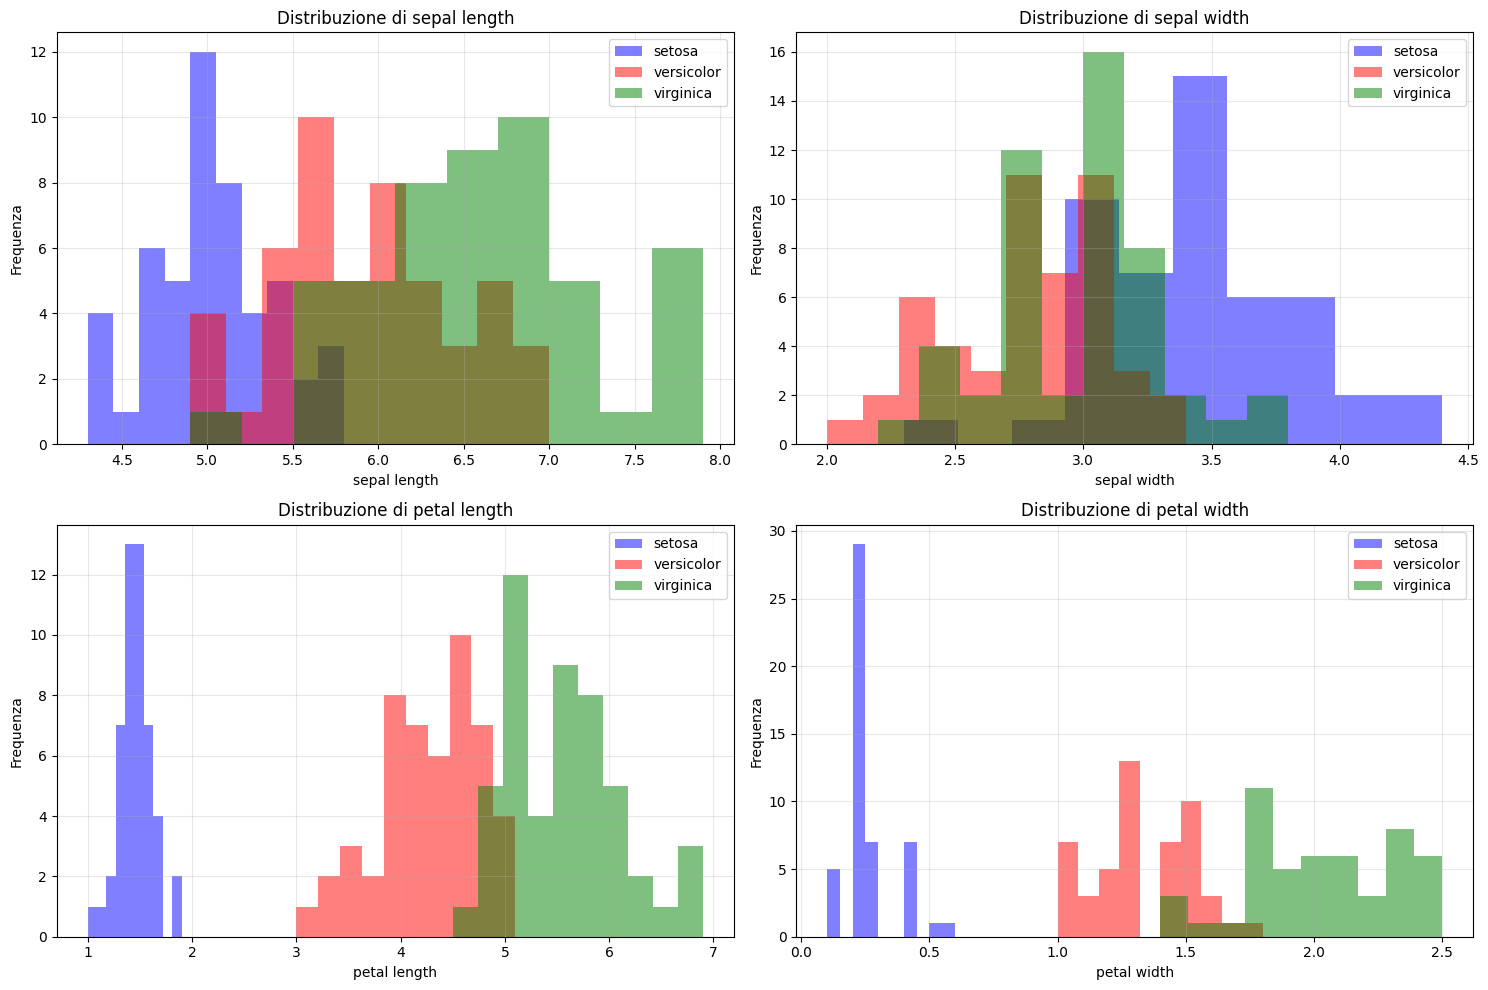


Statistiche delle caratteristiche per classe:

Caratteristica: sepal length

Per setosa:
count    50.00000
mean      5.00600
std       0.35249
min       4.30000
25%       4.80000
50%       5.00000
75%       5.20000
max       5.80000
Name: sepal length, dtype: float64

Per versicolor:
count    50.000000
mean      5.936000
std       0.516171
min       4.900000
25%       5.600000
50%       5.900000
75%       6.300000
max       7.000000
Name: sepal length, dtype: float64

Per virginica:
count    50.00000
mean      6.58800
std       0.63588
min       4.90000
25%       6.22500
50%       6.50000
75%       6.90000
max       7.90000
Name: sepal length, dtype: float64

Caratteristica: sepal width

Per setosa:
count    50.000000
mean      3.428000
std       0.379064
min       2.300000
25%       3.200000
50%       3.400000
75%       3.675000
max       4.400000
Name: sepal width, dtype: float64

Per versicolor:
count    50.000000
mean      2.770000
std       0.313798
min       2.000000
25%       2

In [31]:
# Visualizziamo le distribuzioni delle feature per classe
plt.figure(figsize=(15, 10))

colors = ['blue', 'red', 'green']

for i, feature in enumerate(feature_names):
    plt.subplot(2, 2, i+1)
    
    for j, class_value in enumerate(range(3)):
        data = df_iris[df_iris['class'] == class_value][feature]
        plt.hist(data, alpha=0.5, label=class_names[j], color=colors[j], bins=10)
    
    plt.title(f'Distribuzione di {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequenza')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Visualizziamo anche le statistiche per ogni feature e classe
print("\nStatistiche delle caratteristiche per classe:")
for feature in feature_names:
    print(f"\nCaratteristica: {feature}")
    for class_value, class_name in enumerate(class_names):
        print(f"\nPer {class_name}:")
        stats = df_iris[df_iris['class'] == class_value][feature].describe()
        print(stats)

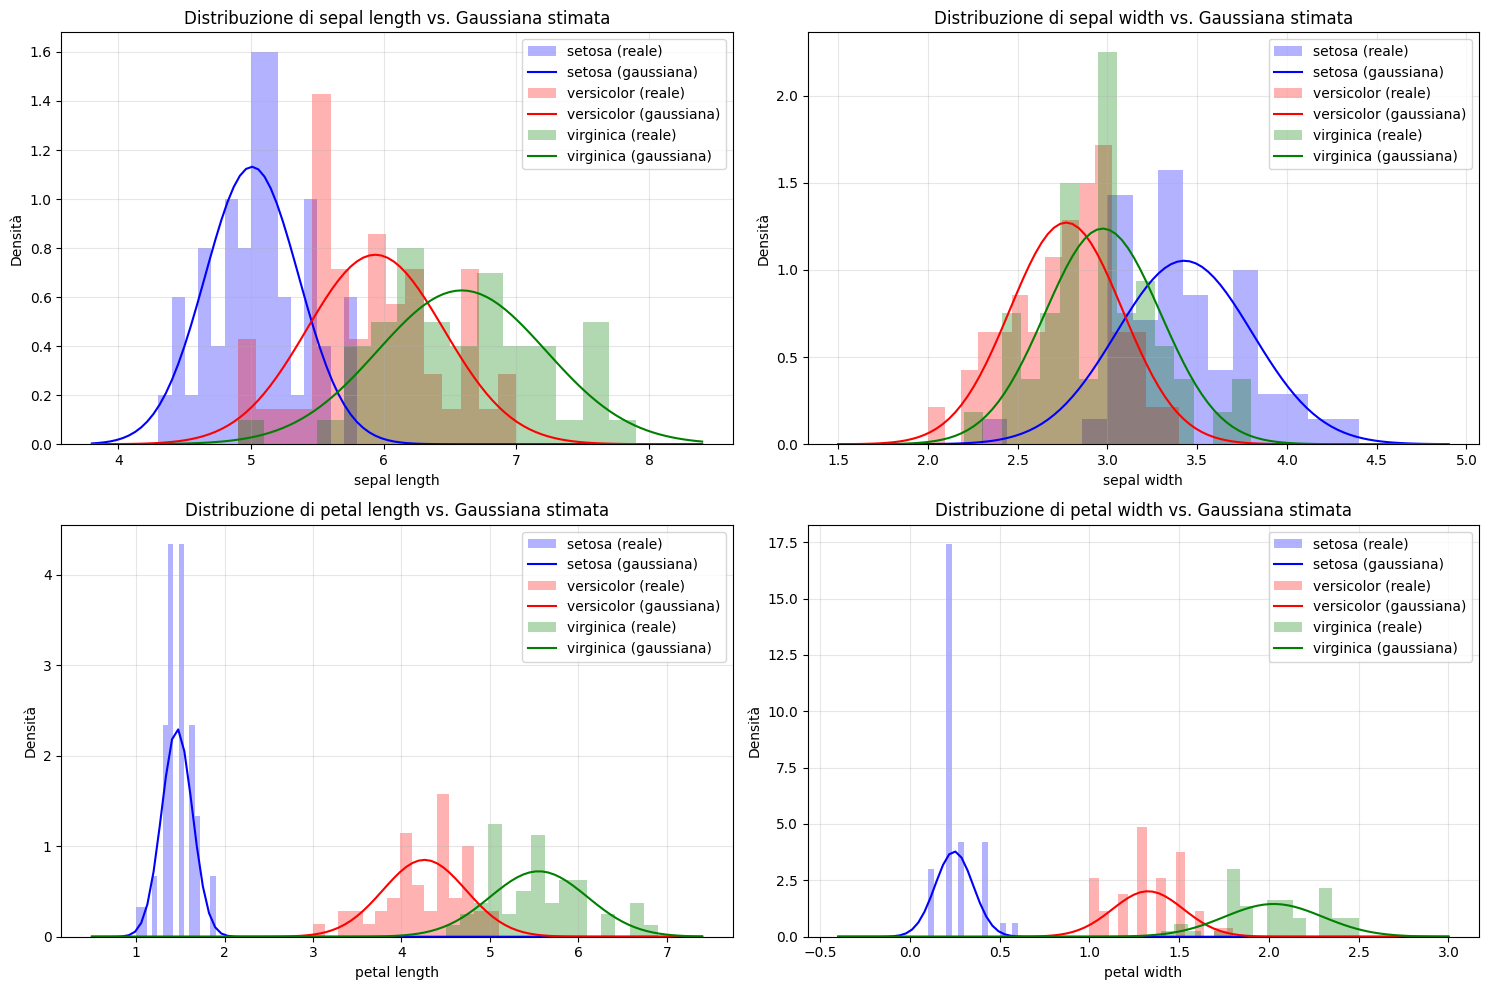

In [32]:
# Visualizziamo le distribuzioni delle feature per classe
plt.figure(figsize=(15, 10))

colors = ['blue', 'red', 'green']
x_range = {}  # Dizionario per memorizzare i range di ogni feature

# Calcoliamo prima i range per ogni feature
for feature in feature_names:
    x_range[feature] = (
        df_iris[feature].min() - 0.5,
        df_iris[feature].max() + 0.5
    )

for i, feature in enumerate(feature_names):
    plt.subplot(2, 2, i+1)
    
    # Plot histogram and gaussian for each class
    for j, class_value in enumerate(range(3)):
        data = df_iris[df_iris['class'] == class_value][feature]
        
        # Histogram
        plt.hist(data, alpha=0.3, label=f"{class_names[j]} (reale)", 
                color=colors[j], bins=15, density=True)
        
        # Gaussian fit
        mean = data.mean()
        std = data.std()
        x = np.linspace(x_range[feature][0], x_range[feature][1], 100)
        y = norm.pdf(x, mean, std)
        plt.plot(x, y, color=colors[j], label=f"{class_names[j]} (gaussiana)")
    
    plt.title(f'Distribuzione di {feature} vs. Gaussiana stimata')
    plt.xlabel(feature)
    plt.ylabel('Densità')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Accuratezza del Naive Bayes Gaussiano: 0.9778

Parametri appresi dal modello:

Probabilità a priori:
P(setosa) = 0.2952
P(versicolor) = 0.3524
P(virginica) = 0.3524

Medie:

Classe: setosa
  Media di sepal length: 4.9645
  Media di sepal width: 3.3774
  Media di petal length: 1.4645
  Media di petal width: 0.2484

Classe: versicolor
  Media di sepal length: 5.8622
  Media di sepal width: 2.7243
  Media di petal length: 4.2108
  Media di petal width: 1.3027

Classe: virginica
  Media di sepal length: 6.5595
  Media di sepal width: 2.9865
  Media di petal length: 5.5459
  Media di petal width: 2.0054

Varianze:

Classe: setosa
  Varianza di sepal length: 0.1120
  Varianza di sepal width: 0.1366
  Varianza di petal length: 0.0333
  Varianza di petal width: 0.0115

Classe: versicolor
  Varianza di sepal length: 0.2753
  Varianza di sepal width: 0.0872
  Varianza di petal length: 0.2393
  Varianza di petal width: 0.0413

Classe: virginica
  Varianza di sepal length: 0.4224
  Varianza di se

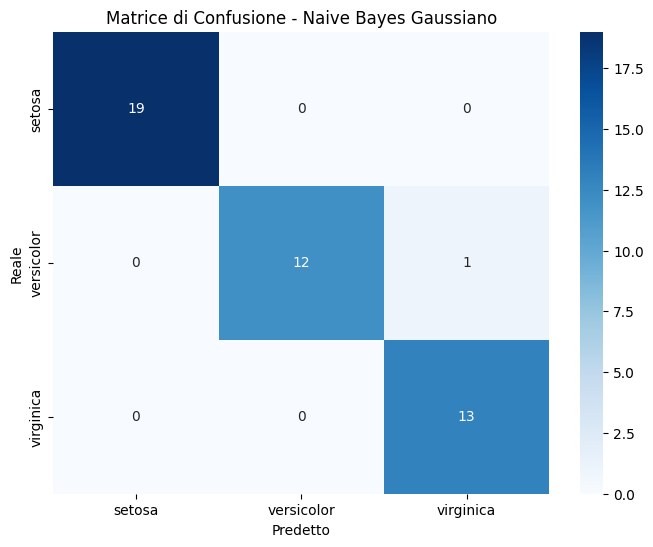


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [33]:
# Dividiamo in train e test
# Addestriamo il modello Naive Bayes Gaussiano
gnb = GaussianNaiveBayes()
gnb.fit(X_train, y_train)

# Valutiamo il modello
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuratezza del Naive Bayes Gaussiano: {accuracy:.4f}")

# Mostriamo i parametri appresi
print("\nParametri appresi dal modello:")
print("\nProbabilità a priori:")
for c, class_name in enumerate(class_names):
    print(f"P({class_name}) = {gnb.class_priors[c]:.4f}")

print("\nMedie:")
for c, class_name in enumerate(class_names):
    print(f"\nClasse: {class_name}")
    for feature_idx, feature_name in enumerate(feature_names):
        print(f"  Media di {feature_name}: {gnb.means[c][feature_idx]:.4f}")

print("\nVarianze:")
for c, class_name in enumerate(class_names):
    print(f"\nClasse: {class_name}")
    for feature_idx, feature_name in enumerate(feature_names):
        print(f"  Varianza di {feature_name}: {gnb.variances[c][feature_idx]:.4f}")

# Calcoliamo la matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predetto')
plt.ylabel('Reale')
plt.title('Matrice di Confusione - Naive Bayes Gaussiano')
plt.show()

# Mostriamo il classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

Risultati con scikit-learn GaussianNB:
Accuratezza: 0.9778

Confronto accuratezze:
Nostra implementazione: 0.9778
Scikit-learn: 0.9778


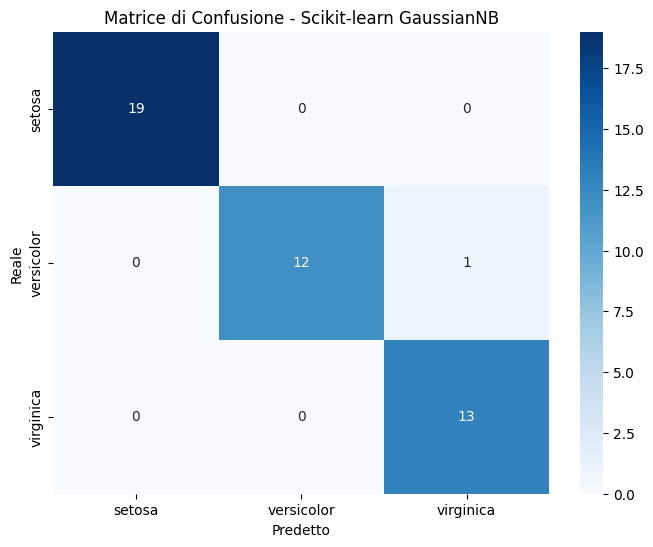


Classification Report (Scikit-learn):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


Parametri appresi da scikit-learn:

Probabilità a priori:
P(setosa) = 0.2952
P(versicolor) = 0.3524
P(virginica) = 0.3524

Medie:

Classe: setosa
  Media di sepal length: 4.9645
  Media di sepal width: 3.3774
  Media di petal length: 1.4645
  Media di petal width: 0.2484

Classe: versicolor
  Media di sepal length: 5.8622
  Media di sepal width: 2.7243
  Media di petal length: 4.2108
  Media di petal width: 1.3027

Classe: virginica
  Media di sepal length: 6.5595
  Media di sepal width: 2.9865
  Media di petal length: 5.5459
  Media di petal width: 2.0054

Varianze:

Clas

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Creiamo e addestriamo il modello di sklearn
sk_gnb = GaussianNB()
sk_gnb.fit(X_train, y_train)

# Facciamo le predizioni
sk_y_pred = sk_gnb.predict(X_test)
sk_accuracy = accuracy_score(y_test, sk_y_pred)

print("Risultati con scikit-learn GaussianNB:")
print(f"Accuratezza: {sk_accuracy:.4f}")

# Confrontiamo con la nostra implementazione
print(f"\nConfronto accuratezze:")
print(f"Nostra implementazione: {accuracy:.4f}")
print(f"Scikit-learn: {sk_accuracy:.4f}")

# Visualizziamo la matrice di confusione
plt.figure(figsize=(8, 6))
sk_conf_matrix = confusion_matrix(y_test, sk_y_pred)
sns.heatmap(sk_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predetto')
plt.ylabel('Reale')
plt.title('Matrice di Confusione - Scikit-learn GaussianNB')
plt.show()

# Mostriamo il classification report
print("\nClassification Report (Scikit-learn):")
print(classification_report(y_test, sk_y_pred, target_names=class_names))

# Confrontiamo i parametri appresi
print("\nParametri appresi da scikit-learn:")
print("\nProbabilità a priori:")
for i, class_name in enumerate(class_names):
    print(f"P({class_name}) = {sk_gnb.class_prior_[i]:.4f}")

print("\nMedie:")
for i, class_name in enumerate(class_names):
    print(f"\nClasse: {class_name}")
    for j, feature_name in enumerate(feature_names):
        print(f"  Media di {feature_name}: {sk_gnb.theta_[i,j]:.4f}")

print("\nVarianze:")
for i, class_name in enumerate(class_names):
    print(f"\nClasse: {class_name}")
    for j, feature_name in enumerate(feature_names):
        print(f"  Varianza di {feature_name}: {sk_gnb.var_[i,j]:.4f}")